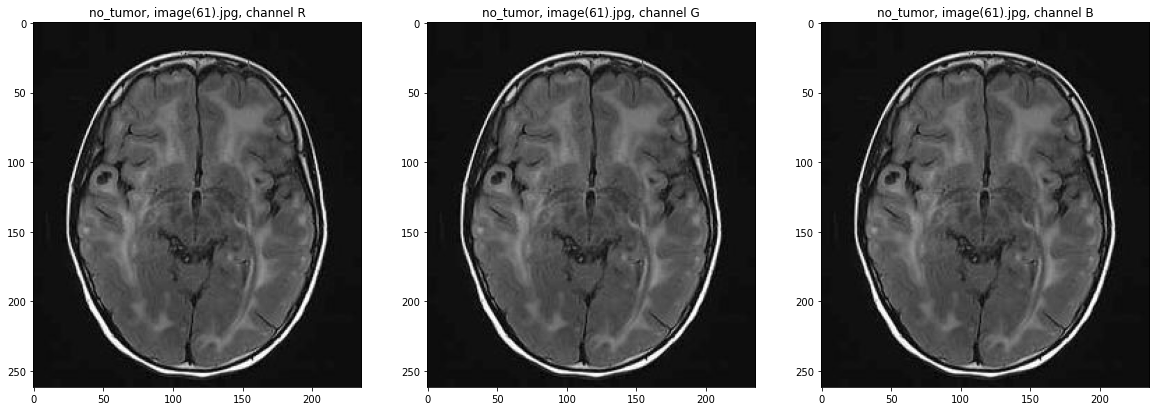

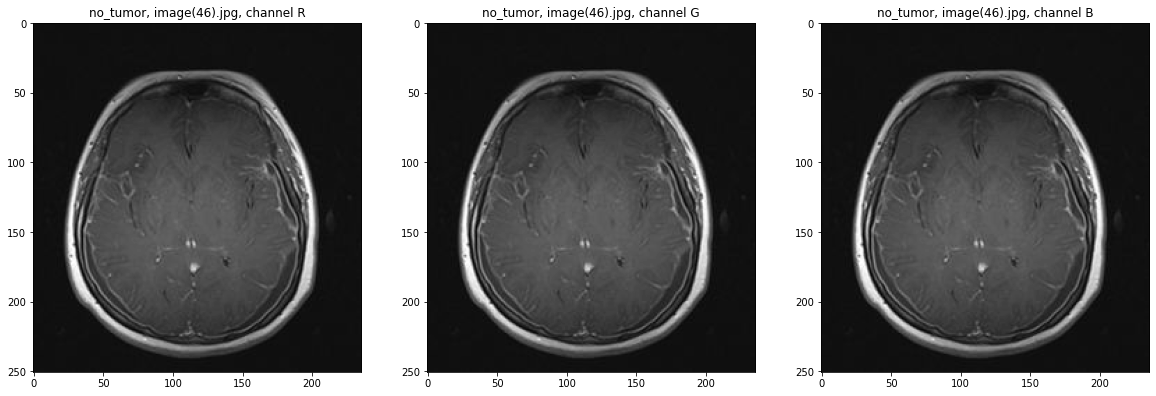

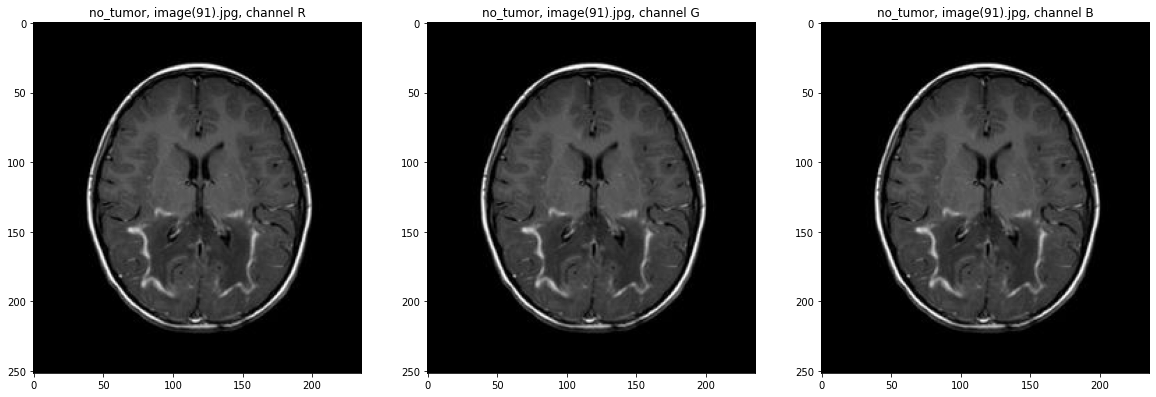

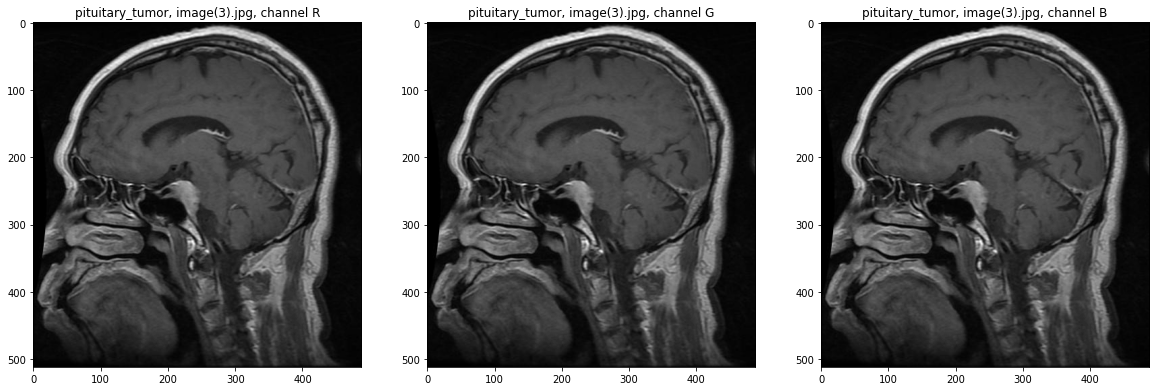

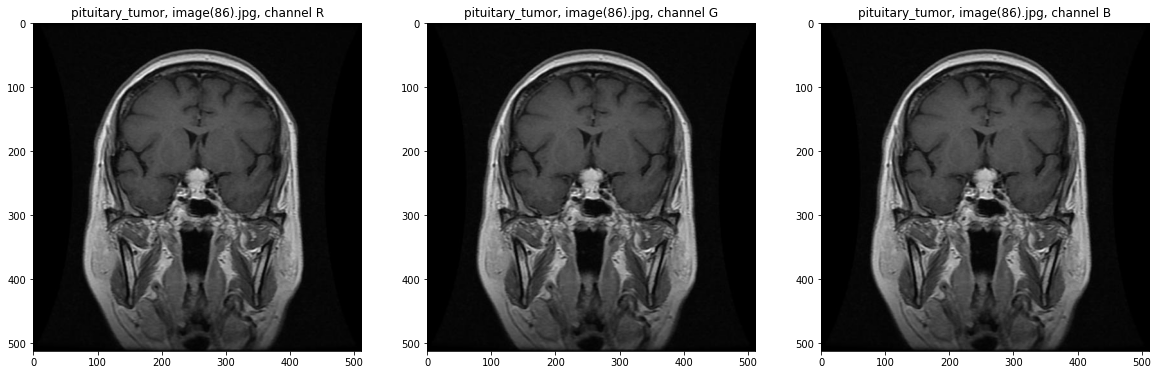

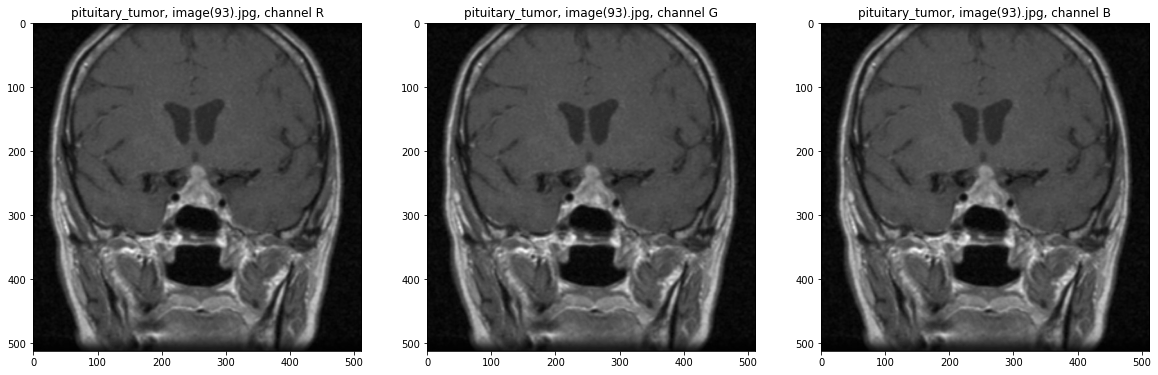

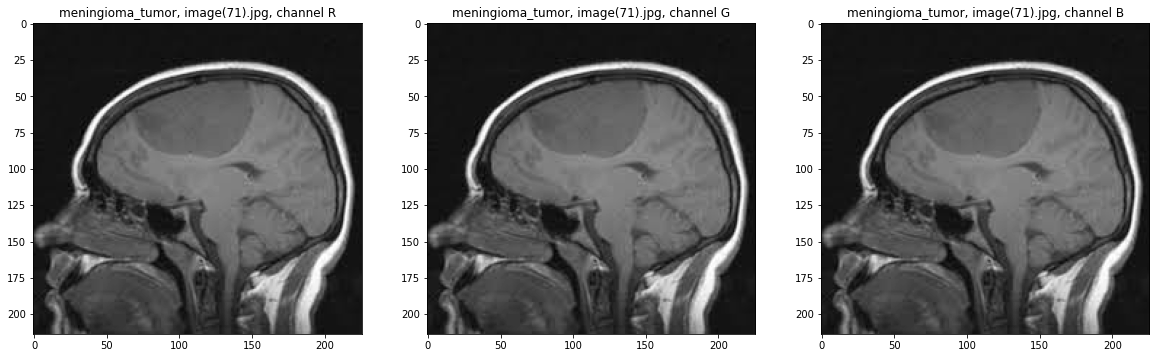

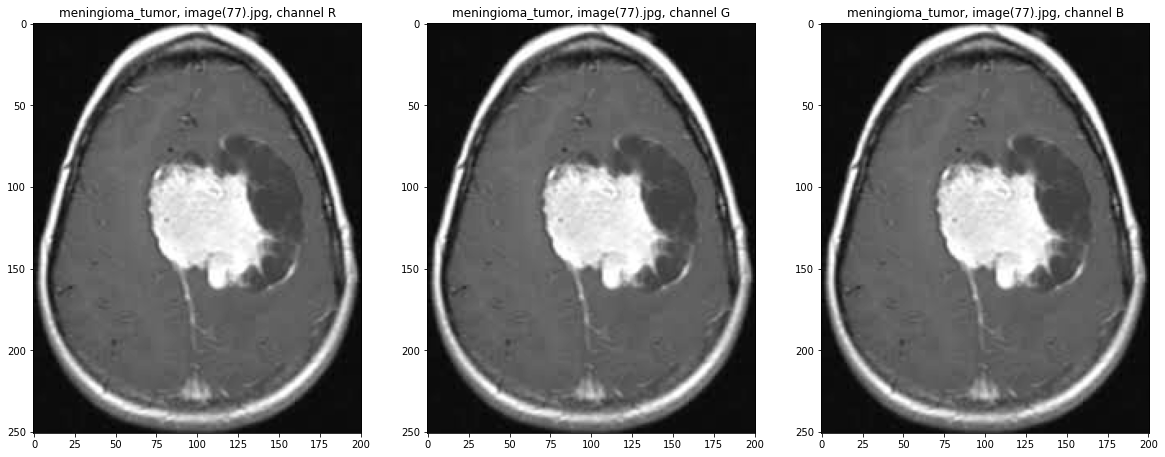

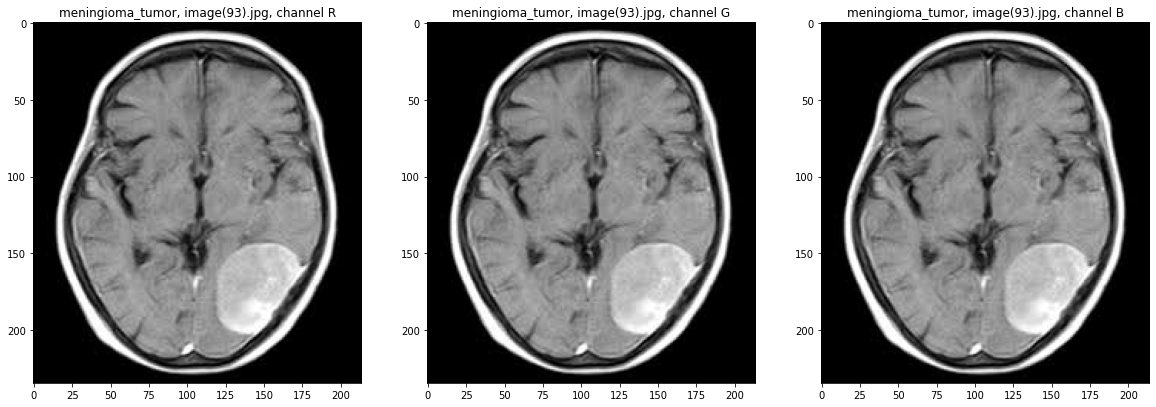

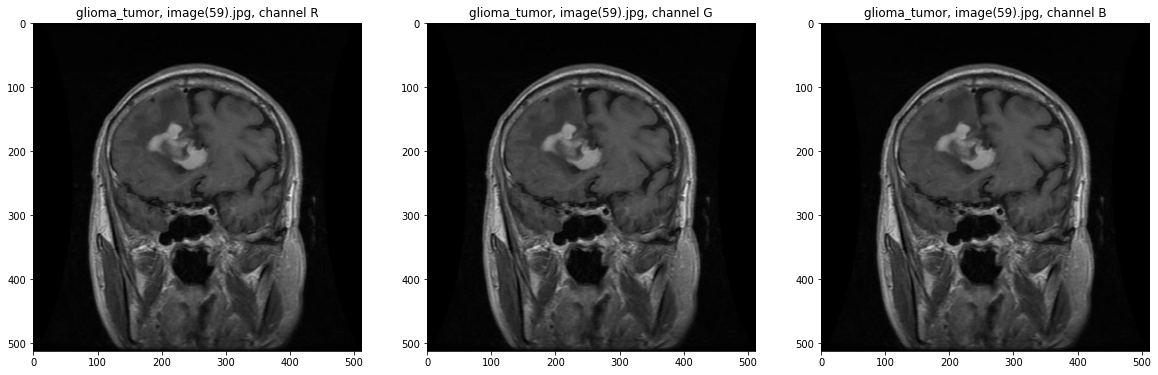

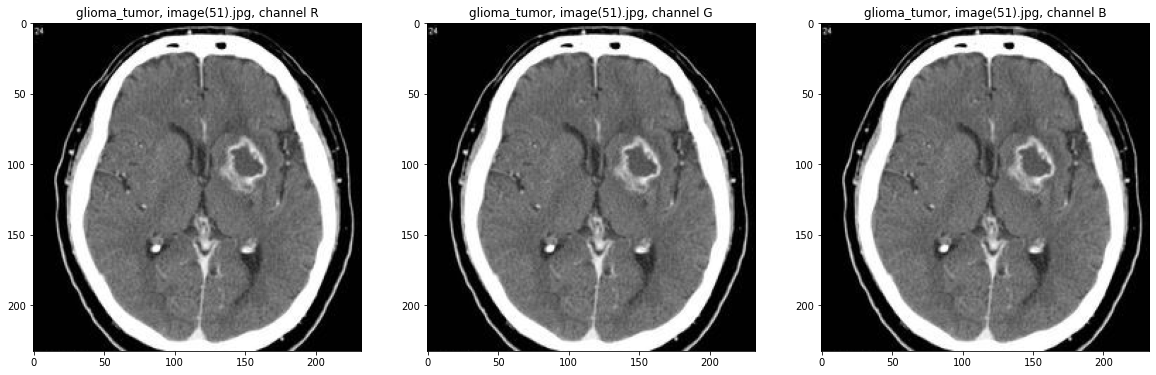

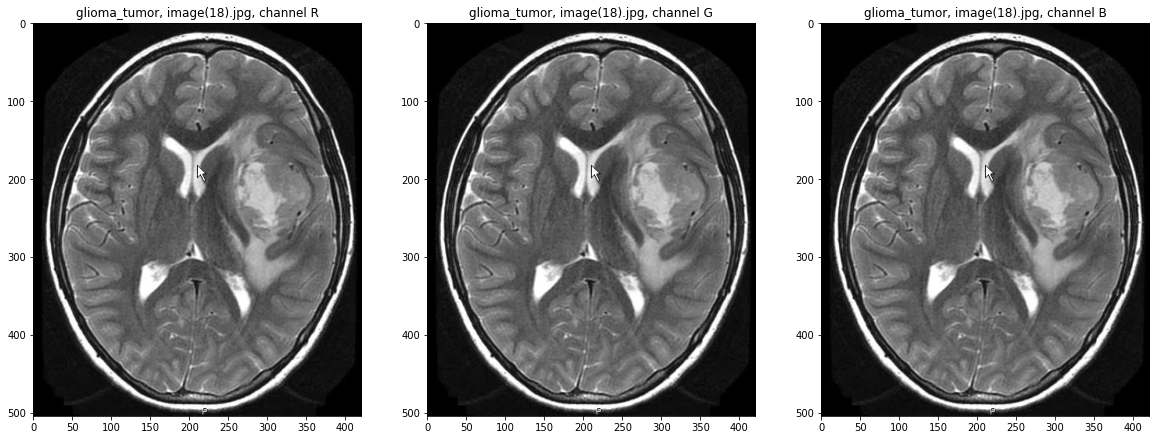

In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2

import os
from os import listdir
from os.path import isfile, join
from pathlib import Path
import cv2

import random

#Visualizing test set
all_classes = ['no_tumor', 'pituitary_tumor', 'meningioma_tumor', 'glioma_tumor']
Test_path = '/kaggle/input/brain-tumor-classification-mri/Testing/pituitary_tumor'

for clas in all_classes:
    Test_path = '/kaggle/input/brain-tumor-classification-mri/Testing/' + clas
    k = 1
    lim = 3
    for dirname, _, filenames in os.walk(Test_path):
        random.shuffle(filenames)
        for filename in filenames:
            #print(os.path.join(dirname, filename))
            if k>lim:
                break
            file_path = dirname + "//" + filename
            img = plt.imread(file_path)   #lecture
            fig, ax = plt.subplots(1,3, figsize=(20,20))
            #plt.imshow(np.mean(img.T, axis =0).T, cmap = "gray")
            chan = ['R', 'G', 'B']
            for i in range(3):
                ax[i].imshow(img[:,:,i], cmap='gray')
                ax[i].set_title("{}, {}, channel {}".format(clas, filename, chan[i]))
                #ax[i].set_xticks([])
                #ax[i].set_yticks([])
            k+=1



In [9]:
#evaluating the repartition of training set

Train_path = '/kaggle/input/brain-tumor-classification-mri/Training/'
all_classes = [x[0] for x in os.walk(Train_path)][1:]
#print(all_classes)

repartition = {}
for folder in all_classes:
    folder_name = folder.split('/')[-1]
    #print(folder_name)
    repartition[folder_name]=0
    all_files = [f for f in listdir(folder) if isfile(join(folder, f))]
    new_files = ["{}\\{}".format(folder, f) for f in all_files]
    for filename in new_files:
        #print(os.path.join(dirname, filename))
        repartition[folder_name] +=1
print(repartition)



{'no_tumor': 395, 'pituitary_tumor': 827, 'meningioma_tumor': 822, 'glioma_tumor': 826}


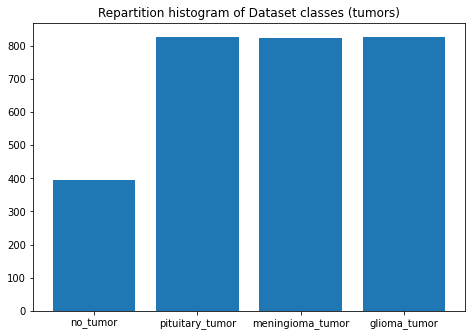

In [10]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(repartition.keys(),repartition.values() )
plt.title("Repartition histogram of Dataset classes (tumors)")
plt.show()

In [11]:
def moment(img, order):
    mean = np.mean(img)
    mom = np.sum((img - mean)**order)/img.shape[0]
    return mom

gray_data = []
label = []
label_ind=0
for folder in all_classes:
    folder_name = folder.split('/')[-1]
    repartition[folder_name]=0
    all_files = [f for f in listdir(folder) if isfile(join(folder, f))]
    new_files = ["{}//{}".format(folder, f) for f in all_files]
    for filename in new_files:
        img = plt.imread(filename)   #lecture
        gray = np.mean(img.T, axis = 0).T
        gray = gray.flatten(order='C')
        skewness = moment(img, 3)
        kurtosis = moment(img,  4)
        feat_i = np.array([mean, std, skewness, kurtosis])
        gray_data.append(feat_i)
        label.append(label_ind)
    label_ind +=1
    

label = np.array(label)

print(label.shape)

gray_data = np.array(gray_data)
print(gray_data.shape)

gray_new_features = []

(2870,)
(2870, 4)


#Statistical feature extraction 

def moment(img, mean, order):
    mom = np.sum((img - mean)**order)/img.shape[0]
    return mom
    

for img in gray_data:
    mean = np.mean(img)
    std = np.std(img)
    #new_std = np.sqrt(moment(chan, mean, 2))
    skewness = moment(img, mean, 3)
    kurtosis = moment(img, mean,  4)
    feat_i = np.array([mean, std, skewness, kurtosis])
    gray_new_features.append(feat_i)
gray_new_features= np.array(gray_new_features)
    
print(gray_new_features.shape)
print(gray_new_features)